In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns

In [18]:
data = pd.read_csv('data/userTrainData.csv', usecols=['user_id', 'business_id', 'stars', 'text'])

# General

In [3]:
print('Total users: ' + str(data['user_id'].nunique()))
print('Total businesses: ' + str(data['business_id'].nunique()))

Total users: 239007
Total businesses: 159168


# Missing Data

According to describe() function there are no missing data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303580 entries, 0 to 2303579
Data columns (total 4 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      object 
 1   business_id  object 
 2   stars        float64
 3   text         object 
dtypes: float64(1), object(3)
memory usage: 70.3+ MB


<AxesSubplot:ylabel='Frequency'>

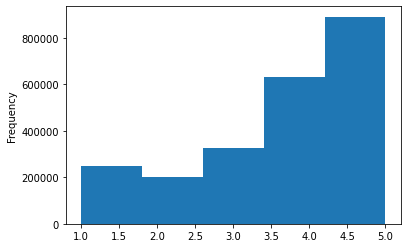

In [22]:
data['stars'].plot.hist(bins=5)

# Number reviews per business

In [5]:
num_reviews_per_business = data.groupby('business_id')['user_id'].count().reset_index().rename(
    columns={'user_id': '#reviews'})
num_reviews_per_business.describe()

,#reviews
count,159168.000000
mean,14.472633
std,42.786480
min,1.000000
25%,2.000000
50%,4.000000
75%,11.000000
max,2595.000000


In [6]:
num_reviews_per_business['#reviews'].value_counts(normalize=True)

1      0.166208
2      0.163833
3      0.118114
4      0.078967
5      0.058127
         ...   
705    0.000006
322    0.000006
450    0.000006
578    0.000006
444    0.000006
Name: #reviews, Length: 613, dtype: float64

# Number reviews per users

Remove users that gave more than 100/500 ratings? 1487/28

In [24]:
num_reviews_per_users = data.groupby('user_id')['business_id'].count().reset_index().rename(
    columns={'business_id': '#reviews'})
num_reviews_per_users.describe()

,#reviews
count,239007.000000
mean,9.638128
std,19.139944
min,3.000000
25%,4.000000
50%,5.000000
75%,9.000000
max,2288.000000


<AxesSubplot:ylabel='Frequency'>

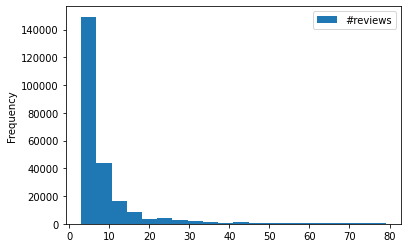

In [32]:
num_reviews_per_users[num_reviews_per_users['#reviews'] < 80].plot.hist(bins=20)

In [8]:
num_reviews_per_users['#reviews'].value_counts(normalize=True)

3      0.238600
4      0.156443
6      0.119566
5      0.109804
7      0.068659
         ...   
225    0.000004
352    0.000004
313    0.000004
716    0.000004
442    0.000004
Name: #reviews, Length: 382, dtype: float64

# Review text length

In [9]:
data['text_len'] = data['text'].apply(lambda x: len(x))
data['text_len'].describe().reset_index()b

,index,text_len
0,count,2.303580e+06
1,mean,6.549019e+02
2,std,5.916611e+02
3,min,1.000000e+00
4,25%,2.650000e+02
5,50%,4.750000e+02
6,75%,8.430000e+02
7,max,5.228000e+03


# Yelp Buissness Preprocessing

### Data Loading

In [2]:
buisness_data = pd.read_csv('data/yelp_business.csv', usecols=['business_id','name','stars','review_count','categories'])

In [3]:
total_businesses = buisness_data['business_id'].nunique()

In [143]:
print("Average buissness rating: "+ str(buisness_data['stars'].mean()))

Average buissness rating: 3.6321956612647295


## Categories Analysis

In [4]:
buisness_data['split_categories'] = buisness_data["categories"].str.split(";")

In [5]:
categories_count = {}

In [6]:
for categories_list in buisness_data['split_categories'].values.tolist():
    for category in categories_list:
        if not category in categories_count:
            categories_count[category] = 0
        categories_count[category] += 1

In [7]:
categories_share = {}
for key in categories_count:
    categories_share[key] = categories_count[key] / total_businesses

In [8]:
def get_top_n_categories(categories_list,n):
    self_categories_shares = {}
    for category in categories_list:
        self_categories_shares[category] = categories_share[category]
    return sorted(self_categories_shares, key=self_categories_shares.get, reverse=True)[:n]

In [9]:
top_n = 5

In [10]:
buisness_data['top '+str(top_n)+' categories'] = buisness_data['split_categories'].apply(lambda x: get_top_n_categories(x, top_n))

In [11]:
buisness_encoding = pd.get_dummies(buisness_data['top '+str(top_n)+' categories'].apply(pd.Series).stack()).sum(level=0)

In [12]:
buisness_to_csv = pd.concat([buisness_data['business_id'],buisness_encoding],axis=1)

In [13]:
buisness_to_csv.to_csv('data/yelp_business_categories_matrix.csv',index=False)

# Results Analysis for SVD MF

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
SVD_results_data = pd.read_csv('results/basic_model_results.csv')

In [5]:
SVDpp_results_data = pd.read_csv('results/advanced_model_results.csv')

In [6]:
SVD_results_data

,learning rate,sgd step size,latent factors,iterations,last RMSE,RMSE list,last MAE,MAE list
0,0.05,0.05,50,3,1.889012,"[1.9015361666523658, 1.8914529006809349, 1.889...",1.257738,"[1.285100366777442, 1.2663049562474475, 1.2577..."
1,0.05,0.05,100,3,1.886531,"[1.9007470934251622, 1.8900721625607624, 1.886...",1.259054,"[1.2892006405505299, 1.2691414333605167, 1.259..."
2,0.05,0.04,50,4,1.891023,"[1.9068614340551042, 1.8958705295526967, 1.892...",1.257238,"[1.2913284675545564, 1.272532849895011, 1.2631..."
3,0.05,0.04,100,4,1.882936,"[1.901517065989485, 1.888864497665093, 1.88470...",1.253706,"[1.2922797234703958, 1.2710406628890518, 1.260..."
4,0.05,0.03,50,5,1.886956,"[1.9098925079917086, 1.896322729661742, 1.8910...",1.252721,"[1.2941181065432232, 1.2749027555762626, 1.264..."
5,0.05,0.03,100,6,1.882256,"[1.907330467442044, 1.892065140208319, 1.88662...",1.252652,"[1.302070508283285, 1.2795552444366973, 1.2683..."
6,0.04,0.05,50,3,1.884761,"[1.895985431960666, 1.8865806694835754, 1.8847...",1.254667,"[1.2812471727376205, 1.2629726863211141, 1.254..."
7,0.04,0.05,100,3,1.891112,"[1.9055162850088492, 1.8945271607045462, 1.891...",1.261947,"[1.2924106491655418, 1.2718217391818882, 1.261..."
8,0.04,0.04,50,4,1.886614,"[1.9028541645297472, 1.8913185847832104, 1.887...",1.253046,"[1.2875380423837381, 1.2680631471829416, 1.258..."
9,0.04,0.04,100,4,1.887709,"[1.9061857135453948, 1.893097084312832, 1.8896...",1.255214,"[1.2934232977328026, 1.2718219391128494, 1.261..."


In [7]:
SVDpp_results_data

,learning rate,sgd step size,latent factors,implicit learning rate,random const,iterations,last RMSE,RMSE list,last MAE,MAE list
0,0.03,0.03,50,0.010,0.05,1,2.654840,"[2.654840187542132, 2.6945117714269404]",1.907789,"[1.9077885128973107, 1.9425200373438603]"
1,0.03,0.03,100,0.010,0.05,1,2.681908,"[2.6819080055192517, 2.7015344657696594]",1.928979,"[1.9289792187687387, 1.9458248784894798]"
2,0.03,0.03,50,0.010,0.10,1,2.671258,"[2.671258109538589, 2.6987219724246203]",1.919408,"[1.9194079646023712, 1.9475777748857777]"
3,0.03,0.03,100,0.010,0.10,2,2.695790,"[2.70690768545297, 2.695790295466786, 2.711493...",1.942351,"[1.9532761025148468, 1.9423508844547777, 1.957..."
4,0.03,0.03,50,0.010,0.25,1,2.696989,"[2.6969891930704133, 2.702917362430366]",1.944923,"[1.9449229993905064, 1.9504559982896028]"
5,0.03,0.03,100,0.010,0.25,1,2.690315,"[2.690314631214121, 2.7021628776932527]",1.938783,"[1.938783295763362, 1.9498086878235426]"
6,0.03,0.03,50,0.010,0.50,1,2.692941,"[2.692941486237938, 2.7040212807196244]",1.938167,"[1.9381665462845217, 1.948678372617969]"
7,0.03,0.03,100,0.010,0.50,1,2.691858,"[2.691858046312181, 2.702459497248269]",1.937765,"[1.9377654214698834, 1.9477137001363984]"
8,0.03,0.03,50,0.025,0.05,1,1.955370,"[1.9553695582198887, 2.9441411455684325]",1.346949,"[1.346949295036702, 2.216302441897898]"
9,0.03,0.03,100,0.025,0.05,1,2.624124,"[2.624123736035308, 2.9472739718383365]",1.925519,"[1.925519001989313, 2.218865553432977]"
